In [12]:
import pandas as pd
import re
import json
import ast
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [15]:
df =  pd.read_excel("vnexpress_articles_4.xlsx")

In [4]:
df.head()

,Title,Link,Author,Author Link,Category,Comments Count,Date,Detailed Title,Description,Content,Comments
0,Tam giác mục tiêu 2025,https://vnexpress.net/tam-giac-muc-tieu-2025-4...,Cấn Văn Lực,https://vnexpress.net/tac-gia/can-van-luc-998....,Kinh doanh & quản trị,3.0,"Thứ tư, 1/1/2025, 00:00 (GMT+7)",Tam giác mục tiêu 2025,Chuyên gia kinh tế,Năm 2024 qua đi với bối cảnh quốc tế thuận ngh...,"[{'Nickname': 'dinhquang3082003', 'Nickname Li..."
1,Động lực kinh tế tư nhân,https://vnexpress.net/dong-luc-kinh-te-tu-nhan...,Nguyễn Hoa Cương,https://vnexpress.net/tac-gia/nguyen-hoa-cuong...,Kinh doanh & quản trị,1.0,"Thứ tư, 1/1/2025, 10:00 (GMT+7)",Động lực kinh tế tư nhân,Chuyên gia kinh tế,Cảm tưởng không có gì ngăn được dòng năng lượn...,"[{'Nickname': 'Nhật Nhật Tân.', 'Nickname Link..."
2,Miễn học phí ngành Y?,https://vnexpress.net/mien-hoc-phi-nganh-y-483...,Nguyễn Minh Hoàng,https://vnexpress.net/tac-gia/nguyen-minh-hoan...,Giáo dục & tri thức,56.0,"Thứ ba, 31/12/2024, 00:00 (GMT+7)",Miễn học phí ngành Y?,Nhà công tác xã hội và phát triển cộng đồng,Tôi không vội kết luận nên hay không nên thông...,"[{'Nickname': 'Khánh Super', 'Nickname Link': ..."
3,Đến Việt Nam chữa bệnh,https://vnexpress.net/den-viet-nam-chua-benh-4...,Nguyễn Hồng Hà,https://vnexpress.net/tac-gia/nguyen-hong-ha-1...,Y tế & sức khỏe,53.0,"Thứ hai, 30/12/2024, 00:00 (GMT+7)",Đến Việt Nam chữa bệnh,Bác sĩ phẫu thuật,Lấy bệnh lý tai nhỏ bẩm sinh làm ví dụ. Tai bì...,"[{'Nickname': 'hanhantramchuong', 'Nickname Li..."
4,'Ăn cắp' thời công nghệ,https://vnexpress.net/an-cap-thoi-cong-nghe-48...,Quan Thế Dân,https://vnexpress.net/tac-gia/quan-the-dan-144...,Văn hóa & lối sống,15.0,"Chủ nhật, 29/12/2024, 00:00 (GMT+7)",'Ăn cắp' thời công nghệ,"Bác sĩ, Tiến sĩ Y học",Hóa ra có kẻ lấy ảnh của vợ tôi trên mạng xã h...,"[{'Nickname': 'thecong85', 'Nickname Link': 'h..."


In [16]:
df.columns

Index(['Title', 'Link', 'Author', 'Author Link', 'Category', 'Comments Count',
       'Date', 'Detailed Title', 'Description', 'Content', 'Comments'],
      dtype='object')

In [18]:
# def clean_date(date_str):
#     # Lấy phần ngày tháng năm (loại bỏ các ký tự không cần thiết)
#     date_part = date_str.split(",")[1].strip()
#     # Chuyển đổi chuỗi thành định dạng datetime
#     date_obj = pd.to_datetime(date_part, format='%d/%m/%Y')
#     # Định dạng lại chuỗi ngày
#     return date_obj.strftime('%A, %d/%m/%Y')
# df['Formatted_Date'] = df['Date'].apply(clean_date)

In [19]:
df = df.drop(columns=['Date', 'Detailed Title', 'Comments Count', 'Content', 'Link'])
df.head(5)

,Title,Author,Author Link,Category,Description,Comments
0,Tam giác mục tiêu 2025,Cấn Văn Lực,https://vnexpress.net/tac-gia/can-van-luc-998....,Kinh doanh & quản trị,Chuyên gia kinh tế,"[{'Nickname': 'dinhquang3082003', 'Nickname Li..."
1,Động lực kinh tế tư nhân,Nguyễn Hoa Cương,https://vnexpress.net/tac-gia/nguyen-hoa-cuong...,Kinh doanh & quản trị,Chuyên gia kinh tế,"[{'Nickname': 'Nhật Nhật Tân.', 'Nickname Link..."
2,Miễn học phí ngành Y?,Nguyễn Minh Hoàng,https://vnexpress.net/tac-gia/nguyen-minh-hoan...,Giáo dục & tri thức,Nhà công tác xã hội và phát triển cộng đồng,"[{'Nickname': 'Khánh Super', 'Nickname Link': ..."
3,Đến Việt Nam chữa bệnh,Nguyễn Hồng Hà,https://vnexpress.net/tac-gia/nguyen-hong-ha-1...,Y tế & sức khỏe,Bác sĩ phẫu thuật,"[{'Nickname': 'hanhantramchuong', 'Nickname Li..."
4,'Ăn cắp' thời công nghệ,Quan Thế Dân,https://vnexpress.net/tac-gia/quan-the-dan-144...,Văn hóa & lối sống,"Bác sĩ, Tiến sĩ Y học","[{'Nickname': 'thecong85', 'Nickname Link': 'h..."


In [26]:
import ast

# Function to process Comments_Post
def extract_comments_info(comments):
    result = []

    # Kiểm tra nếu 'comments' là một chuỗi và cố gắng chuyển thành danh sách từ điển
    if isinstance(comments, str):
        try:
            comments = ast.literal_eval(comments)  # Safely evaluate the string
        except (SyntaxError, ValueError):
            # Xử lý trường hợp chuyển đổi thất bại (ví dụ, JSON không hợp lệ)
            return result  # Trả về kết quả rỗng nếu chuyển đổi thất bại

    # Kiểm tra nếu 'comments' là một danh sách hoặc từ điển
    if isinstance(comments, list):  # Nếu là danh sách, tiếp tục xử lý
        for comment in comments:
            if isinstance(comment, dict):  # Đảm bảo comment là từ điển
                result.append({
                    "Nickname": comment.get("Nickname", ""),
                    "Nickname Link": comment.get("Nickname Link", ""),
                    "Reply Nicknames": comment.get("Reply Nicknames", []),
                    "Reply Links": comment.get("Reply Links", [])
                })
    # Nếu 'comments' không phải là danh sách hoặc chuỗi hợp lệ, trả về kết quả rỗng
    return result

# Apply extraction to the Comments_Post column
df['Processed_Comments'] = df['Comments'].apply(lambda x: extract_comments_info(x) if isinstance(x, (str, list)) else [])

# Drop the original Comments_Post column for cleaner display
df.drop(columns=['Comments'], inplace=True)


In [22]:
df['Comments'][0]

"[{'Nickname': 'dinhquang3082003', 'Nickname Link': 'https://my.vnexpress.net/users/feed/1080039082', 'Comment': 'dinhquang3082003bình luận đầu tiên của bài báo đầu tiên năm 2025', 'Likes': '25', 'Comment Time': '18h trước', 'Reply Nicknames': [], 'Reply Links': []}, {'Nickname': 'quangtrip821511', 'Nickname Link': 'https://my.vnexpress.net/users/feed/1105112204', 'Comment': 'quangtrip821511Chúc các bạn, anh, chị, cô, chú, các bác cùng ông bà một năm mới 2025 thật nhiều sức khoẻ hạnh phúc và thành công', 'Likes': '12', 'Comment Time': '12h trước', 'Reply Nicknames': [], 'Reply Links': []}, {'Nickname': 'manhcuongls1995', 'Nickname Link': 'https://my.vnexpress.net/users/feed/1101752690', 'Comment': 'manhcuongls1995Kỷ nguyên vươn mình của dân tộc bắt đầu từ thời khắc này', 'Likes': '3', 'Comment Time': '4h trước', 'Reply Nicknames': [], 'Reply Links': []}]"

In [29]:
df['Processed_Comments']

,Processed_Comments
0,"[{'Nickname': 'dinhquang3082003', 'Nickname Li..."
1,"[{'Nickname': 'Nhật Nhật Tân.', 'Nickname Link..."
2,"[{'Nickname': 'Khánh Super', 'Nickname Link': ..."
3,"[{'Nickname': 'hanhantramchuong', 'Nickname Li..."
4,"[{'Nickname': 'thecong85', 'Nickname Link': 'h..."
...,...
3260,[]
3261,[{'Nickname': 'Hãy thêm chức năng giới hạn chơ...
3262,[]
3263,"[{'Nickname': 'Dr. Jack', 'Nickname Link': 'ja..."


In [30]:
import pandas as pd

# Giả sử df['Processed_Comments'] có dữ liệu như bạn đã mô tả
# df = pd.read_csv("your_file.csv")  # Đọc dữ liệu vào từ file CSV nếu cần thiết

# Hàm xử lý từng comment trong cột 'Processed_Comments'
def process_comments(comments):
    processed_data = []

    # Duyệt qua từng bình luận trong danh sách
    for comment in comments:
        if isinstance(comment, dict):  # Kiểm tra nếu comment là từ điển
            # Thêm bản ghi chính của nickname
            processed_data.append({
                'Id': comment['Nickname Link'],
                'Nickname': comment['Nickname']
            })

            # Xử lý Reply Nicknames và Reply Links
            for reply_nickname, reply_link in zip(comment.get('Reply Nicknames', []), comment.get('Reply Links', [])):
                processed_data.append({
                    'Id': reply_link,  # Dùng reply_link làm Id
                    'Nickname': reply_nickname  # Dùng reply_nickname làm Nickname
                })

    return processed_data

# Duyệt qua cột 'Processed_Comments' để tạo DataFrame mới
expanded_data = df['Processed_Comments'].apply(process_comments)

# Làm phẳng danh sách các bản ghi trong 'expanded_data'
flattened_data = [item for sublist in expanded_data for item in sublist]

# Tạo DataFrame mới từ dữ liệu đã làm phẳng
df_indent = pd.DataFrame(flattened_data)

# Hiển thị DataFrame kết quả
print(df_indent)


                                                    Id          Nickname
0       https://my.vnexpress.net/users/feed/1080039082  dinhquang3082003
1       https://my.vnexpress.net/users/feed/1105112204   quangtrip821511
2       https://my.vnexpress.net/users/feed/1101752690   manhcuongls1995
3       https://my.vnexpress.net/users/feed/1002685738    Nhật Nhật Tân.
4       https://my.vnexpress.net/users/feed/1026010466       Khánh Super
...                                                ...               ...
146258                                    javascript:;              kiwi
146259                                    javascript:;       Minh Nguyen
146260                                    javascript:;      HOANGPHIHONG
146261  https://my.vnexpress.net/users/feed/1002735669      Thê Tiên Ngô
146262                                    javascript:;         Quang Sơn

[146263 rows x 2 columns]


# Dữ liệu được loại bỏ những người trùng ID

In [31]:
# Kiểm tra các bản ghi trùng lặp dựa trên cả cột 'Id' và 'Nickname'
duplicates = df_indent[df_indent.duplicated(subset=['Id', 'Nickname'], keep=False)]

# Hiển thị các bản ghi trùng lặp
print(duplicates)

# Để loại bỏ các bản ghi trùng lặp và chỉ giữ lại một bản sao
df_indent_unique = df_indent.drop_duplicates(subset=['Id', 'Nickname'], keep='first')

# Hiển thị DataFrame đã loại bỏ trùng lặp
print(df_indent_unique)


                                                    Id          Nickname
0       https://my.vnexpress.net/users/feed/1080039082  dinhquang3082003
1       https://my.vnexpress.net/users/feed/1105112204   quangtrip821511
3       https://my.vnexpress.net/users/feed/1002685738    Nhật Nhật Tân.
4       https://my.vnexpress.net/users/feed/1026010466       Khánh Super
5       https://my.vnexpress.net/users/feed/1052413533       Dung Nguyen
...                                                ...               ...
146247                                    javascript:;              thái
146248                                    javascript:;           nongdan
146257                                    javascript:;   www.thanh.thanh
146259                                    javascript:;       Minh Nguyen
146260                                    javascript:;      HOANGPHIHONG

[98108 rows x 2 columns]
                                                    Id          Nickname
0       https://my.vnexpr

In [32]:
# Kiểm tra các ID không chứa chuỗi "https://my.vnexpress.net/users/feed/"
missing_feed_ids = df_indent_unique[~df_indent_unique['Id'].str.contains("https://my.vnexpress.net/users/feed/", na=False)]

# Đếm số lượng các ID không chứa chuỗi trên
count_missing_feed_ids = missing_feed_ids.shape[0]

# Hiển thị kết quả
print(f"Số lượng ID không có 'https://my.vnexpress.net/users/feed/': {count_missing_feed_ids}")


Số lượng ID không có 'https://my.vnexpress.net/users/feed/': 24875


In [33]:
missing_feed_ids

,Id,Nickname
26419,javascript:;,Harry Phong Nguyen
26432,javascript:;,duongdzungtoo
26441,javascript:;,hungho30793
26484,javascript:;,Hien Le Thanh
26490,javascript:;,vinhhainam
...,...,...
146254,javascript:;,Phan Thi Minh Khoa
146255,javascript:;,đào thủy
146256,javascript:;,chiếc lá
146258,javascript:;,kiwi


<ipython-input-34-51fb6c0532ca>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_feed_ids['Encoded_Id'] = label_encoder.fit_transform(missing_feed_ids['Id'])


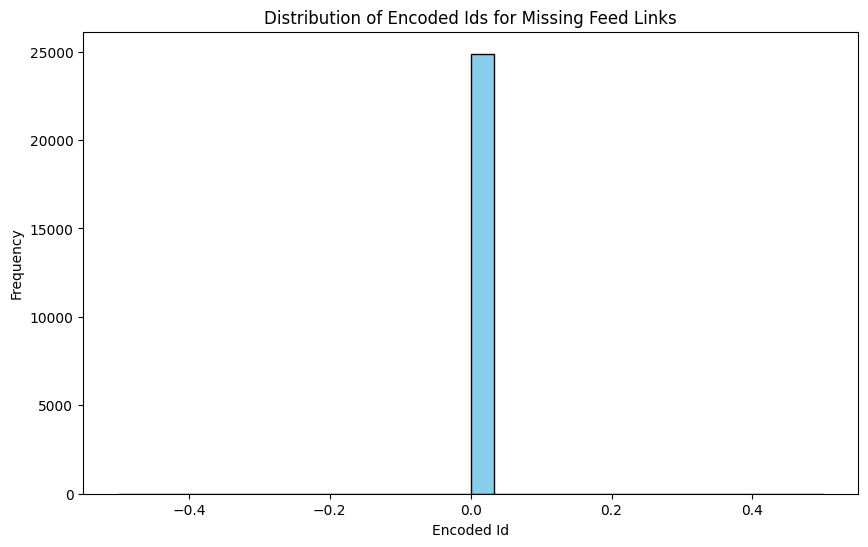

In [34]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Kiểm tra các ID không chứa chuỗi "https://my.vnexpress.net/users/feed/"
missing_feed_ids = df_indent_unique[~df_indent_unique['Id'].str.contains("https://my.vnexpress.net/users/feed/", na=False)]

# Sử dụng LabelEncoder để mã hóa các giá trị trong cột 'Id' của missing_feed_ids
label_encoder = LabelEncoder()

# Mã hóa các ID
missing_feed_ids['Encoded_Id'] = label_encoder.fit_transform(missing_feed_ids['Id'])

# Vẽ đồ thị phân phối các ID đã được mã hóa
plt.figure(figsize=(10, 6))
plt.hist(missing_feed_ids['Encoded_Id'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Encoded Ids for Missing Feed Links')
plt.xlabel('Encoded Id')
plt.ylabel('Frequency')
plt.show()


In [35]:
# Kiểm tra xem DataFrame df_indent_unique có tồn tại chưa
if 'df_indent_unique' in locals():
    # Đếm số lượng các bản ghi trùng lặp trong cột 'Id'
    duplicate_ids_count = df_indent_unique['Id'].duplicated().sum()
    print(f"Số lượng ID trùng lặp: {duplicate_ids_count}")
else:
    print("DataFrame df_indent_unique chưa được xác định.")


Số lượng ID trùng lặp: 24902


In [36]:
a = 24902 - 24875
print(a)

27


In [37]:
missing_feed_ids

,Id,Nickname,Encoded_Id
26419,javascript:;,Harry Phong Nguyen,0
26432,javascript:;,duongdzungtoo,0
26441,javascript:;,hungho30793,0
26484,javascript:;,Hien Le Thanh,0
26490,javascript:;,vinhhainam,0
...,...,...,...
146254,javascript:;,Phan Thi Minh Khoa,0
146255,javascript:;,đào thủy,0
146256,javascript:;,chiếc lá,0
146258,javascript:;,kiwi,0


In [38]:
df['Processed_Comments']

,Processed_Comments
0,"[{'Nickname': 'dinhquang3082003', 'Nickname Li..."
1,"[{'Nickname': 'Nhật Nhật Tân.', 'Nickname Link..."
2,"[{'Nickname': 'Khánh Super', 'Nickname Link': ..."
3,"[{'Nickname': 'hanhantramchuong', 'Nickname Li..."
4,"[{'Nickname': 'thecong85', 'Nickname Link': 'h..."
...,...
3260,[]
3261,[{'Nickname': 'Hãy thêm chức năng giới hạn chơ...
3262,[]
3263,"[{'Nickname': 'Dr. Jack', 'Nickname Link': 'ja..."


In [40]:
import pandas as pd

# Giả sử df['Processed_Comments'] có dữ liệu như bạn đã mô tả
# df = pd.read_csv("your_file.csv")  # Đọc dữ liệu vào từ file CSV nếu cần thiết

# Hàm xử lý từng comment trong cột 'Processed_Comments'
def process_comments_with_index(comments, index):
    processed_data = []

    # Duyệt qua từng bình luận trong danh sách
    for comment in comments:
        if isinstance(comment, dict):  # Kiểm tra nếu comment là từ điển
            # Thêm bản ghi chính của nickname, kèm theo index
            processed_data.append({
                'Id': comment['Nickname Link'],
                'Nickname': comment['Nickname'],
                'Index': index
            })

            # Xử lý Reply Nicknames và Reply Links
            for reply_nickname, reply_link in zip(comment.get('Reply Nicknames', []), comment.get('Reply Links', [])):
                processed_data.append({
                    'Id': reply_link,  # Dùng reply_link làm Id
                    'Nickname': reply_nickname,  # Dùng reply_nickname làm Nickname
                    'Index': index  # Thêm chỉ số index của bản ghi
                })

    return processed_data

# Duyệt qua cột 'Processed_Comments' để tạo DataFrame mới, lưu trữ chỉ số index
expanded_data = []
for idx, comments in enumerate(df['Processed_Comments']):
    expanded_data.extend(process_comments_with_index(comments, idx))

# Tạo DataFrame mới từ dữ liệu đã làm phẳng
df_indent = pd.DataFrame(expanded_data)

# Hiển thị DataFrame kết quả
print(df_indent)


                                                    Id          Nickname  \
0       https://my.vnexpress.net/users/feed/1080039082  dinhquang3082003   
1       https://my.vnexpress.net/users/feed/1105112204   quangtrip821511   
2       https://my.vnexpress.net/users/feed/1101752690   manhcuongls1995   
3       https://my.vnexpress.net/users/feed/1002685738    Nhật Nhật Tân.   
4       https://my.vnexpress.net/users/feed/1026010466       Khánh Super   
...                                                ...               ...   
146258                                    javascript:;              kiwi   
146259                                    javascript:;       Minh Nguyen   
146260                                    javascript:;      HOANGPHIHONG   
146261  https://my.vnexpress.net/users/feed/1002735669      Thê Tiên Ngô   
146262                                    javascript:;         Quang Sơn   

        Index  
0           0  
1           0  
2           0  
3           1  
4      

In [44]:

# Lọc các ID trong df_indent mà có giá trị 'javascript:;' và lấy các chỉ số (Index) tương ứng trong cột 'Index'
java_ids_indices = df_indent[df_indent['Id'] == 'javascript:;']['Index'].tolist()

# Hiển thị kết quả
java_ids_indices


[563,
 563,
 563,
 564,
 564,
 564,
 564,
 564,
 564,
 566,
 567,
 568,
 568,
 568,
 569,
 569,
 570,
 572,
 572,
 573,
 573,
 573,
 573,
 573,
 573,
 573,
 573,
 573,
 573,
 573,
 574,
 574,
 574,
 574,
 574,
 574,
 574,
 574,
 574,
 574,
 574,
 574,
 576,
 576,
 576,
 576,
 576,
 576,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 577,
 578,
 578,
 578,
 578,
 578,
 579,
 579,
 579,
 579,
 579,
 579,
 579,
 579,
 579,
 579,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 580,
 581,
 581,
 581,
 581,
 581,
 581,
 581,
 581,
 581,
 581,
 581,
 581,
 581,
 581,
 583,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 585,
 586,
 586,
 586,
 586,
 586,
 586,
 586,
 586,
 586,
 586,
 586,
 586,
 586,
 587,
 587,
 587,
 587,
 587,
 587,
 587,
 587,
 588,
 588,
 588,
 588,
 588,
 589,
 589,
 589,
 589,
 589,
 589,
 589,
 589,
 589,
 589,
 589,
 589,
 589,
 589,
 589

In [45]:
len(java_ids_indices)

39922

In [47]:
# Loại bỏ các giá trị trùng lặp trong danh sách java_ids_indices
java_ids_indices_unique = list(set(java_ids_indices))

# Hiển thị kết quả
len(java_ids_indices_unique)


2179

In [48]:
# Chuyển danh sách java_ids_indices_unique thành DataFrame với tên cột là 'index'
df_java_ids = pd.DataFrame(java_ids_indices_unique, columns=['index'])

# Lưu DataFrame này vào file Excel
output_path = 'error_ids_VNExpress.xlsx'
df_java_ids.to_excel(output_path, index=False)

# Trả về đường dẫn file đã lưu
output_path


'error_ids_VNExpress.xlsx'